In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/train_data.csv')

In [3]:
df.head()

,cif_id,dlk_cob_date,gi_smooth_3m,big_city,cu_gender,cu_education_level,cu_empl_area,cu_empl_level,payroll_f,cur_quantity_pl,...,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level
0,335992,2018-06-30,17.957530,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,144,46.0,1,2
1,335992,2018-04-30,27.720918,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,142,44.0,1,2
2,335992,2018-05-31,21.949626,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,143,45.0,1,2
3,335992,2018-08-31,14.855459,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,146,48.0,1,2
4,335992,2018-03-31,27.917161,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,141,43.0,1,2


In [4]:
df['cc_balance'] = df['cc_balance'].fillna(0)
df['cl_balance'] = df['cl_balance'].fillna(0)
df['ml_balance'] = df['ml_balance'].fillna(0)
df['pl_balance'] = df['pl_balance'].fillna(0)
df['td_volume'] = df['td_volume'].fillna(0)
df['ca_volume'] = df['ca_volume'].fillna(0)
df['sa_volume'] = df['sa_volume'].fillna(0)
df['mf_volume'] = df['mf_volume'].fillna(0)
df['cu_education_level'] = df['cu_education_level'].fillna('unknown')
df['cu_empl_area'] = df['cu_empl_area'].fillna('unknown')
df['cu_empl_level'] = df['cu_empl_level'].fillna('unknown')

In [18]:
df = df.query("active != 0")

In [19]:
df

,cif_id,dlk_cob_date,gi_smooth_3m,big_city,cu_gender,cu_education_level,cu_empl_area,cu_empl_level,payroll_f,cur_quantity_pl,...,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level
0,335992,2018-06-30,17.957530,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,144,46.0,1,2
1,335992,2018-04-30,27.720918,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,142,44.0,1,2
2,335992,2018-05-31,21.949626,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,143,45.0,1,2
3,335992,2018-08-31,14.855459,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,146,48.0,1,2
4,335992,2018-03-31,27.917161,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,141,43.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161778,120605,2018-06-30,52.379263,MSK,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,1,0,1,960.0,34.0,115,31.0,1,2
4161779,120605,2018-02-28,54.218822,MSK,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,1,0,1,960.0,33.0,111,27.0,1,2
4161780,120605,2018-03-31,53.343644,MSK,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,1,0,1,960.0,33.0,112,28.0,1,2
4161781,120605,2018-04-30,52.248182,MSK,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,1,0,1,960.0,34.0,113,29.0,1,2


In [35]:
df.cu_education_level.value_counts()

03. Высшее                           2243910
02. Среднее профессиональное          677809
unknown                               338482
01. Среднее                           310243
04. Второе высшее, ученая степень     299730
Name: cu_education_level, dtype: int64

In [49]:
df["big_city"].replace("MSK", 3, inplace = True)
df["big_city"].replace("OTH", 2, inplace = True)
df["big_city"].replace("MLN", 1, inplace = True)
df["big_city"].replace("SPB", 0, inplace = True)
df["cu_education_level"].replace("unknown", 4, inplace = True)
df["cu_education_level"].replace("03. Высшее", 3, inplace = True)
df["cu_education_level"].replace("02. Среднее профессиональное", 2, inplace = True)
df["cu_education_level"].replace("01. Среднее", 1, inplace = True)
df["cu_education_level"].replace("04. Второе высшее, ученая степень", 0, inplace = True)
df.head()



,cif_id,dlk_cob_date,gi_smooth_3m,big_city,cu_gender,cu_education_level,cu_empl_area,cu_empl_level,payroll_f,cur_quantity_pl,...,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level
0,335992,2018-06-30,17.957530,1,0,2,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,144,46.0,1,2
1,335992,2018-04-30,27.720918,1,0,2,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,142,44.0,1,2
2,335992,2018-05-31,21.949626,1,0,2,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,143,45.0,1,2
3,335992,2018-08-31,14.855459,1,0,2,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,146,48.0,1,2
4,335992,2018-03-31,27.917161,1,0,2,ТОРГОВЛЯ,SUPPORT STAFF,0,1,...,1,0,0,0,1192.8,29.0,141,43.0,1,2


In [50]:
df.cu_education_level.unique()

array([2, 4, 3, 1, 0], dtype=int64)

In [51]:
X_train = df.drop(["gi_smooth_3m", "cu_empl_area", "cu_empl_level","dlk_cob_date" ], axis=1) 
y_train = df.gi_smooth_3m

In [55]:
X_train

,cif_id,big_city,cu_gender,cu_education_level,payroll_f,cur_quantity_pl,cur_quantity_mort,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,...,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level
0,335992,1,0,2,0,1,0,0,0,1,...,1,0,0,0,1192.8,29.0,144,46.0,1,2
1,335992,1,0,2,0,1,0,0,0,1,...,1,0,0,0,1192.8,29.0,142,44.0,1,2
2,335992,1,0,2,0,1,0,0,0,1,...,1,0,0,0,1192.8,29.0,143,45.0,1,2
3,335992,1,0,2,0,1,0,0,0,1,...,1,0,0,0,1192.8,29.0,146,48.0,1,2
4,335992,1,0,2,0,1,0,0,0,1,...,1,0,0,0,1192.8,29.0,141,43.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161778,120605,3,0,2,0,1,0,0,0,1,...,1,1,0,1,960.0,34.0,115,31.0,1,2
4161779,120605,3,0,2,0,1,0,0,0,1,...,1,1,0,1,960.0,33.0,111,27.0,1,2
4161780,120605,3,0,2,0,1,0,0,0,1,...,1,1,0,1,960.0,33.0,112,28.0,1,2
4161781,120605,3,0,2,0,1,0,0,0,1,...,1,1,0,1,960.0,34.0,113,29.0,1,2


In [82]:
clf = DecisionTreeRegressor( max_depth=2)

In [83]:
clf.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

[Text(167.4, 181.2, 'X[16] <= -8049.407\nmse = 2962.738\nsamples = 3870174\nvalue = 42.967'),
 Text(83.7, 108.72, 'X[16] <= -19496.017\nmse = 4032.493\nsamples = 632192\nvalue = 109.445'),
 Text(41.85, 36.23999999999998, 'mse = 6315.88\nsamples = 112899\nvalue = 181.122'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 2176.254\nsamples = 519293\nvalue = 93.861'),
 Text(251.10000000000002, 108.72, 'X[15] <= -31535.017\nmse = 1722.578\nsamples = 3237982\nvalue = 29.987'),
 Text(209.25, 36.23999999999998, 'mse = 11025.432\nsamples = 85684\nvalue = 133.769'),
 Text(292.95, 36.23999999999998, 'mse = 1168.995\nsamples = 3152298\nvalue = 27.166')]

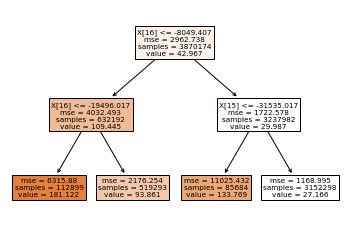

In [84]:
tree.plot_tree(clf, filled=True)